Assignment 1: ANOVA post hoc test comparison
===

In this assignment we analyse GapMinder dataset (included within the course) in order to find significant differences between countries of various income groups vs. average alcohol consumption per capita

Income groups segmentation is taken from World Bank Excel file [Atlas methodology by World Bank, 2014 calendar year](http://siteresources.worldbank.org/DATASTATISTICS/Resources/OGHIST.xls)
* _Low income (L)_ <= 1,045 GNI per capita in US$
* _Lower middle income (LM)_ 1,046-4,125
* _Upper middle income (UM)_ 4,126-12,735
* _High income (H)_ > 12,735

GapMinder country names are different from World Bank's, so not all the GapMinder countries could be tagged with income group lable (unlabled countries would not be analyzed)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import statsmodels.formula.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Prapare datasets:
1. Load initial datasets
+ Convert to numeric
+ Merge/join both datasets
+ Drop lines without _income group_ or _alcohol consumption_ data available

In [2]:
df=pd.read_csv('../datasets/gapminder.csv',index_col='country')
df = df.apply(pd.to_numeric, errors='coerse')
c_gr=pd.read_csv('../datasets/country_groups.csv',index_col='country')
c_gr['incomegroup'] = c_gr['incomegroup'].astype('category')
countries = df.join(c_gr)
countries=countries.dropna(subset=['incomegroup','alcconsumption'])

Analysis of means
---

In [3]:
grouped = countries.groupby('incomegroup')
grouped['alcconsumption'].agg([np.mean, np.std])

,mean,std
incomegroup,,
H,9.609310,4.833306
L,4.134828,3.741997
LM,4.565714,4.530318
UM,6.942083,4.199979


ANOVA analysis
---

In [4]:
lm = sm.ols(formula='alcconsumption ~ C(incomegroup)', data=countries)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         alcconsumption   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 30 Mar 2016   Prob (F-statistic):           5.87e-09
Time:                        00:35:30   Log-Likelihood:                -533.07
No. Observations:                 184   AIC:                             1074.
Df Residuals:                     180   BIC:                             1087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                9.6093      0.582     16.507      0.000         8.461    10.758
C(incomegroup)[T.L]     -5.4745      1.008     -5.430      0.000        -7.464    -3.485
C(incomegroup)[T.LM]    -5.0436      0.860     -5.863      0.000        -6.741    -3.346
C(incomegroup)[T.UM]    -2.6672      0.865     -3.083      0.002        -4.374    -0.960
==============================================================================
Omnibus:                       20.211   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.652
Skew:                           0.641   Prob(JB):                     3.64e-07
Kurtosis:                       4.492   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ANOVA analysis shows that p-value (Prob (F-statistic):	5.87e-09) is well below threshhold level of 0.05 so null-hypothesys could be rejected, i.e. mean alcohol consumption level is different between groups

Perform actual post hoc test
---

In [5]:
tukey = pairwise_tukeyhsd(countries['alcconsumption'],countries['incomegroup'], alpha=0.05)

In [8]:
tukey.summary()

group1,group2,meandiff,lower,upper,reject
H,L,-5.4745,-8.0893,-2.8597,True
H,LM,-5.0436,-7.2745,-2.8127,True
H,UM,-2.6672,-4.9107,-0.4238,True
L,LM,0.4309,-2.2628,3.1245,False
L,UM,2.8073,0.1032,5.5113,True
LM,UM,2.3764,0.0415,4.7112,True


Interpretation:
---
Alcohol consumption is statistically different in between income groups, except for _Lower income_ and _Lower Middle income_ pair

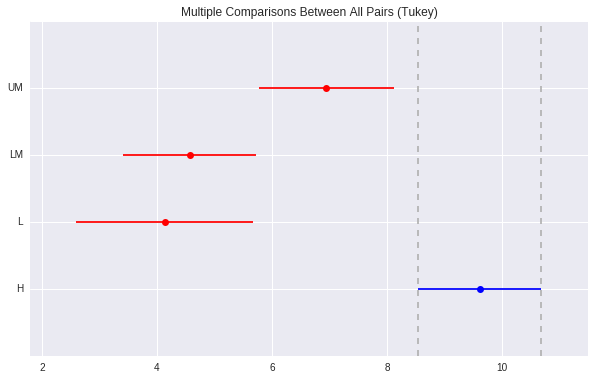

In [9]:
fig = tukey.plot_simultaneous(comparison_name='H')